# 🧀🍷 French Wine & Cheese ETL Project

This notebook demonstrates a simple ETL pipeline using pandas and Azure SQL.  
We’ll work with an open dataset about French cheese or wine, clean it, upload it to Azure SQL, and run some analysis.

**Goal:** Build a data engineering project that simulates a real-world ETL scenario using cloud infrastructure (Azure).


In [1]:
import pandas as pd
import os
from sqlalchemy import create_engine, text
from dotenv import load_dotenv

load_dotenv()


True

In [2]:
# Azure credentials from .env
server = os.getenv("AZURE_SQL_SERVER")
database = os.getenv("AZURE_SQL_DATABASE")
username = os.getenv("AZURE_SQL_USERNAME")
password = os.getenv("AZURE_SQL_PASSWORD")
driver = os.getenv("AZURE_SQL_DRIVER", "ODBC Driver 17 for SQL Server").replace(" ", "+")

connection_string = f"mssql+pyodbc://{username}:{password}@{server}:1433/{database}?driver={driver}"
engine = create_engine(connection_string)


In [15]:
# Query: Count cheeses by milk type
query = """
SELECT TOP 10 "secteur_d'activité", COUNT(*) AS count
FROM degustations
GROUP BY "secteur_d'activité"
ORDER BY count DESC
"""

with engine.connect() as conn:
    result = conn.execute(text(query))
    df_result = pd.DataFrame(result.fetchall(), columns=result.keys())

df_result


,secteur_d'activité,count
0,Agriculture / horticulture / Pêche,574
1,Viticulture,508
2,Agro-alimentaire,434
3,Artisanat / Art,356
4,None,151
5,Agriculture / horticulture / Pêche;Agro-alimen...,93
6,Activités de la mer,61
7,Loisirs et activités,27
8,Agro-alimentaire;Artisanat / Art,16
9,Artisanat / Art;Loisirs et activités,13


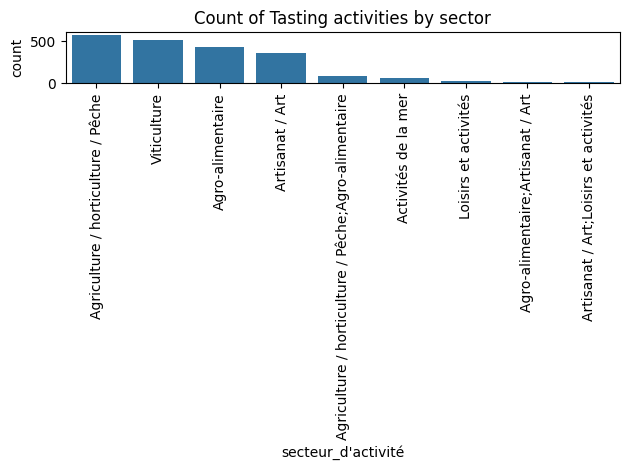

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_result, x="secteur_d'activité", y="count")
plt.title("Count of Tasting activities by sector")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## ✅ Conclusion

We successfully:
- Run basic SQL queries for analysis of tasting activities in Pays de la Loire (data was uploaded with a python script)
- Visualized results with seaborn

🔜 **Next steps**:
- Automate pipeline with Airflow or ADF
- Add more visualizations
- Try with wine or regional specialties dataset
